## Neural Network Classification in TensorFlow

* Architecture of a neural network **classification** model
* Input shapes and output shapes of a **classification** model (features and labels)
* Creating custom data to view and fit
* Steps in modeling
 * Creating a model, compiling a model, fiiting a model, evaluating a model
* Different **classification** evaluation methods
* Saving and loading models

👁️ Andre Karpathy - [A recipe for training Nueral Networks](https://karpathy.github.io/2019/04/25/recipe/)

### Creating Data to view and fit

We can do a small prerehearsal model before rehearsal

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)



In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let`s visualize data to better understand it

In [4]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0],'X1':X[:, 1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


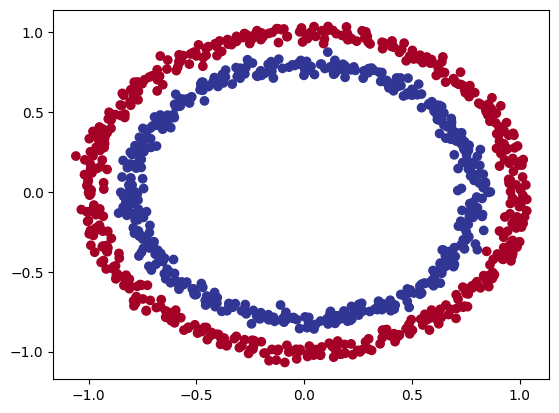

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);


We want a model to predict the line between red and blue

👉 [playground.tensorflow.org](https://playground.tensorflow.org/)

### Input and Output Shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [8]:
# view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

In [9]:
# Import Tensorflow
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed (42)

# 1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 3.9855 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 1.4832 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7336 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7060 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.4960


In [11]:
# Improve our model training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our mdel is getting around 50% accuracy... it's performing as if it's guessing

So let's add one more layer and keep training for longer...

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with two layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000


[0.6942360997200012, 0.5]

### Improving our model

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with three layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6937683820724487, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unnique class falls)

In [14]:
import numpy as np

In [15]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
doing multiclass classification


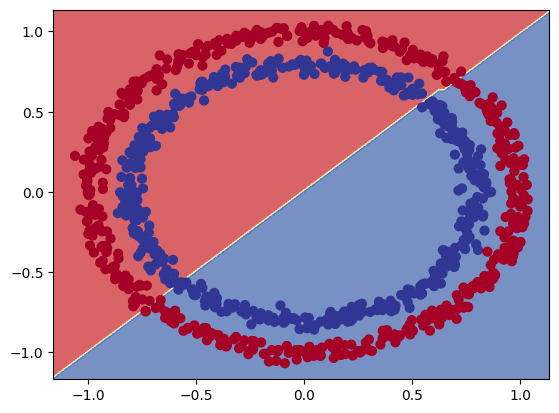

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [17]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]




In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with three layers
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 495.1979 - mae: 495.1979
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 381.0983 - mae: 381.0983
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 272.1457 - mae: 272.1457
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 159.6556 - mae: 159.6556
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 57.5013 - mae: 57.5013
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 79.0672 - mae: 79.0672
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 81.6691 - mae: 81.6691
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 52.4212 - mae: 52.4212
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.7016 - mae: 47.7016
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 48.5168 - mae: 48.5168
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 5ms/step


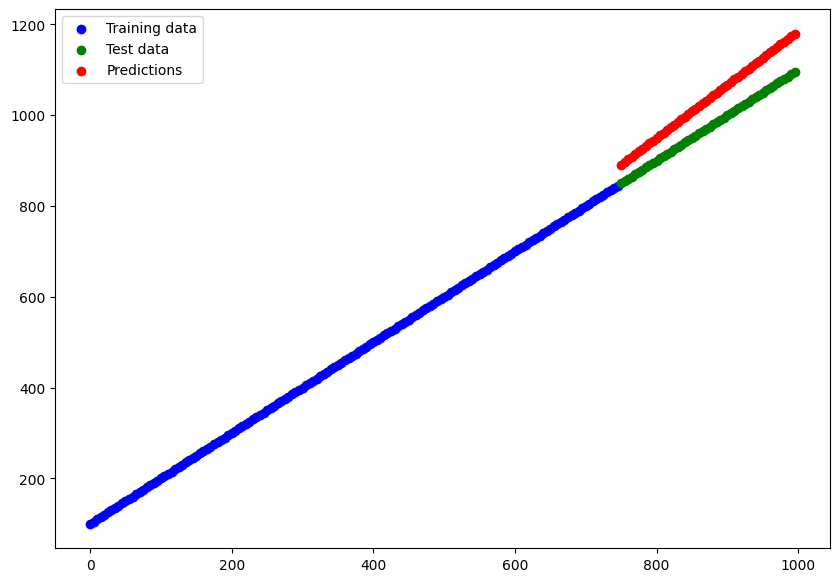

In [19]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

### The missing piece: Non-Linearity

🤔 What could you draw if you had an unlimited amount of straight (linear) and non-straight (non-linear) lines?

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1 Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2 Compile our model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3 Fit the model
history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1107 - accuracy: 0.4963
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0415 - accuracy: 0.4992
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0179 - accuracy: 0.4974
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9848 - accuracy: 0.4995
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9409 - accuracy: 0.4998
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9390 - accuracy: 0.4982
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9202 - accuracy: 0.4991
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9208 - accuracy: 0.4986
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8951 - accuracy: 0.5004
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8455 - accuracy: 0.5010
Epoch 11/

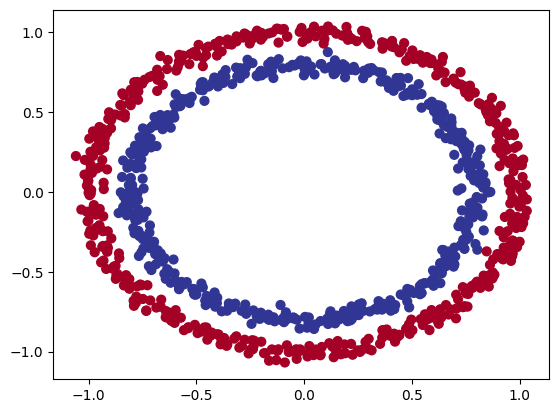

In [21]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
doing multiclass classification


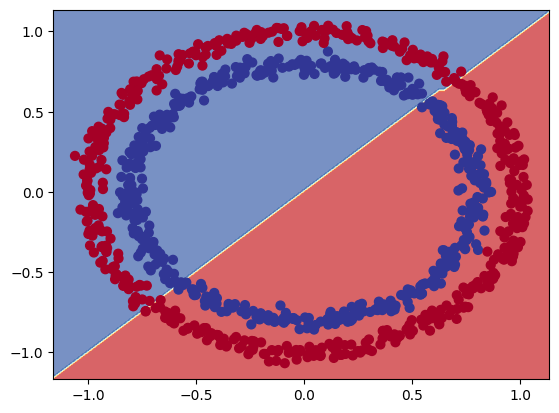

In [22]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let`s try build our first model without linear activation. Starting with ReLU

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history_2 = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.5070
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4970
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5060
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5060
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5110
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5140
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5170
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5150
Epoch 11/

In [24]:
# Evaluate model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.9570


[0.2671228349208832, 0.9570000171661377]

313/313 [==============================] - 1s 1ms/step
doing binary classification


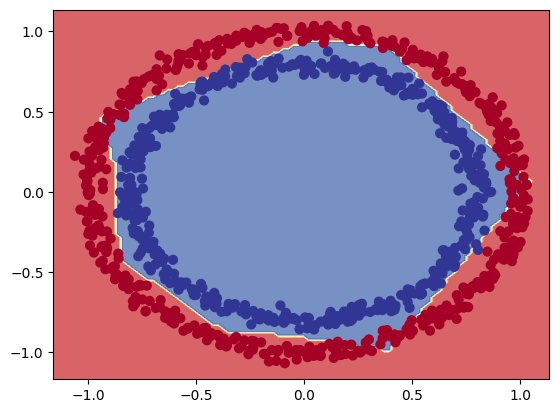

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_6, X, y)

🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: whata data did the model learn on and what data did we predict on?

👁️ **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Time to see in action non-linear functions

In [26]:
# Create a toy tensor (similar to the data que pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

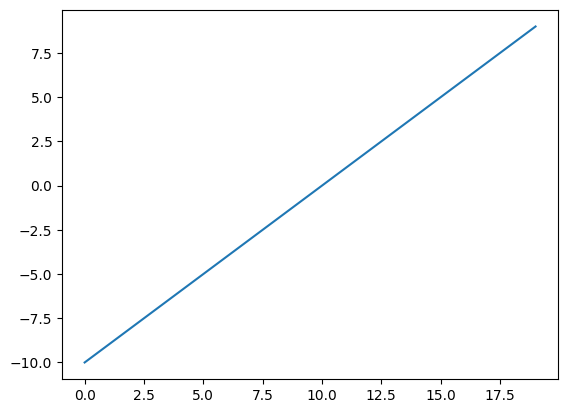

In [27]:
# Visualize our toy tensor
plt.plot(A)

In [28]:
# Let's start by replicating a sigmoid function: sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

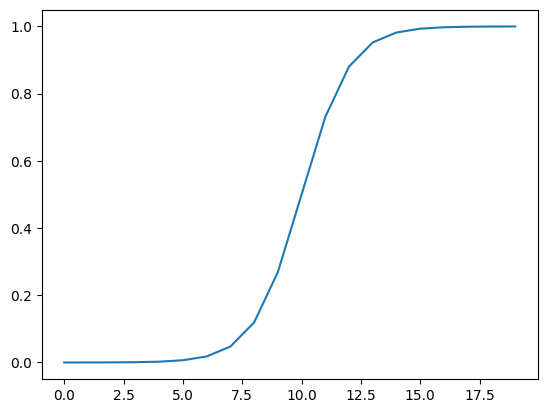

In [29]:
#Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [30]:
# Recreate the ReLU function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

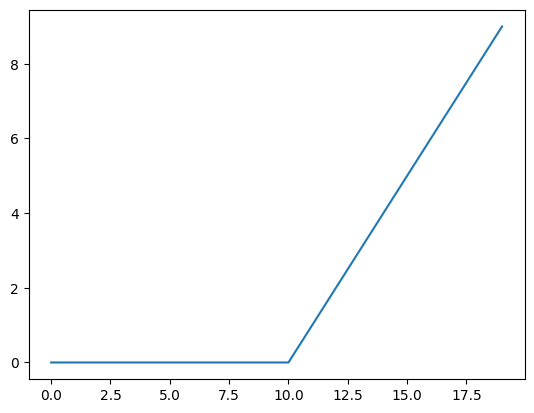

In [31]:
# Plot RELU_modified tensor
plt.plot(relu(A));

In [32]:
# Try the linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

### Evaluating and improving our classification

We need to create a training and a test set

In [33]:
# Check how many examples
len(X)

1000

In [34]:
# Split into train and test set indexing
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [35]:
# Let's recrette a model to fit on the training data
# and evaluate in the test model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# 2. Compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# 3. Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=75)

Epoch 1/75
25/25 [==============================] - 1s 4ms/step - loss: 0.6978 - accuracy: 0.4638
Epoch 2/75
25/25 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.4625
Epoch 3/75
25/25 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5188
Epoch 4/75
25/25 [==============================] - 0s 5ms/step - loss: 0.6798 - accuracy: 0.5700
Epoch 5/75
25/25 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.5925
Epoch 6/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.5763
Epoch 7/75
25/25 [==============================] - 0s 4ms/step - loss: 0.6285 - accuracy: 0.7337
Epoch 8/75
25/25 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.7875
Epoch 9/75
25/25 [==============================] - 0s 4ms/step - loss: 0.5407 - accuracy: 0.8775
Epoch 10/75
25/25 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.9525
Epoch 11/75
25/25 [

In [36]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9950


[0.017726827412843704, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


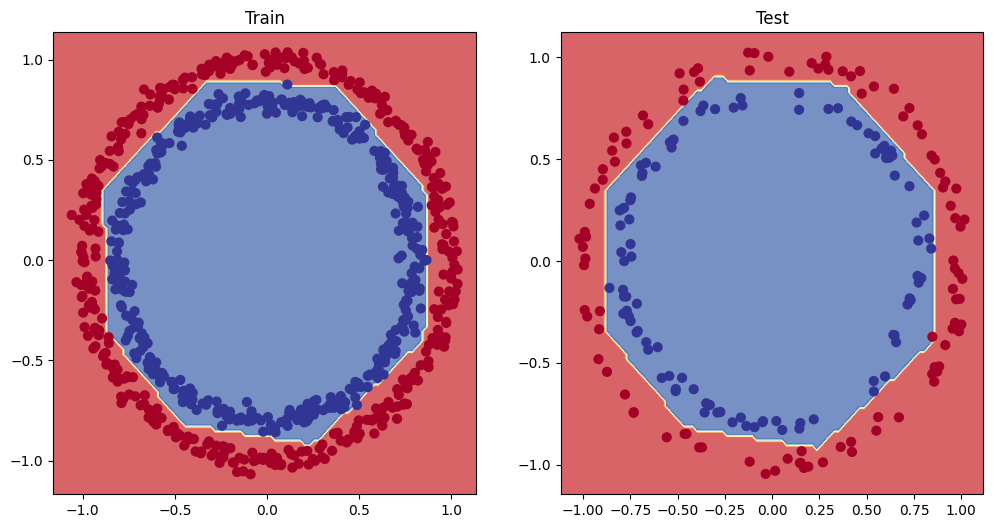

In [37]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)

In [38]:
model_8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Plot the loss (or training curves)

In [39]:
# convert history_8 into a dataframe
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.697820,0.46375
1,0.691497,0.46250
2,0.686991,0.51875
3,0.679815,0.57000
4,0.672298,0.59250
...,...,...
70,0.020071,0.99625
71,0.016696,0.99750
72,0.014901,1.00000
73,0.015506,0.99875


Text(0.5, 1.0, 'Model_8 loss curves')

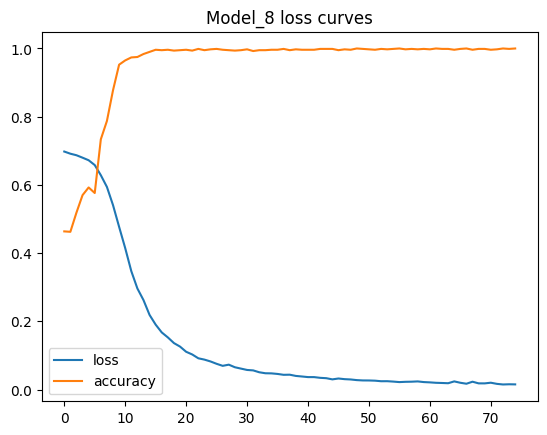

In [40]:
# Plot the loss curves
pd.DataFrame(history_8.history).plot()
plt.title('Model_8 loss curves')

👁️ **Note:** For many problems, the loss function going down means the model is improving ( the predictions it's making are getting closer to the ground truth labels.)

### Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it's training.
* Another model
* A modified loss curves plot.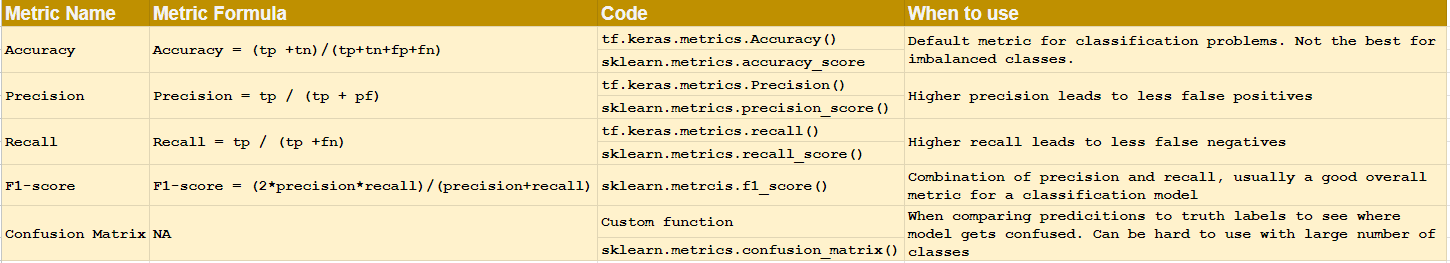

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6992 - accuracy: 0.4875 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.4850 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4863 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.4863 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4875 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4913 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4900 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

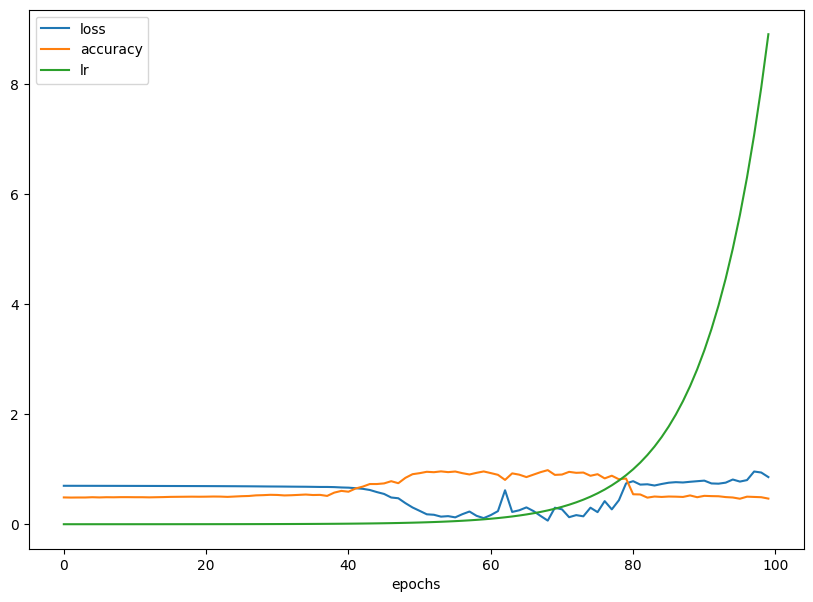

In [42]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs');


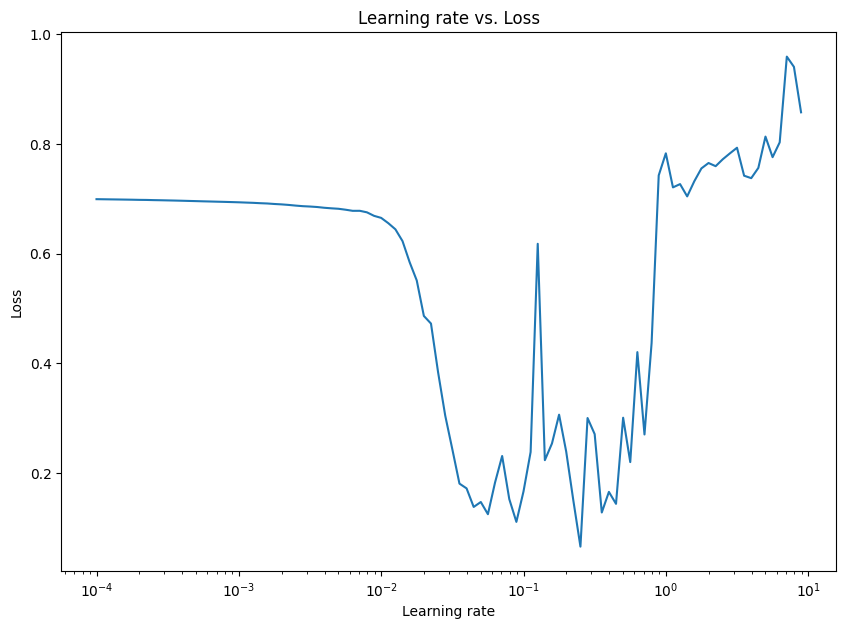

In [43]:
# plot the learning rate versus the loss
lrs = 1e-4 *(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss');

In [44]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [45]:
10**-1.5

0.03162277660168379

Let's create another model with a more "accurate" learning rate

In [46]:
# Set randmom seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# Fit the model for 20 epochs (or more)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6826 - accuracy: 0.5425
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6087
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.6525
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7613
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7513
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8225
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8975
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.9162
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9350
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9563
Epoch 11/20
25/25 [

In [47]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9700


[0.10668370872735977, 0.9700000286102295]

In [48]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9950


[0.017726827412843704, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


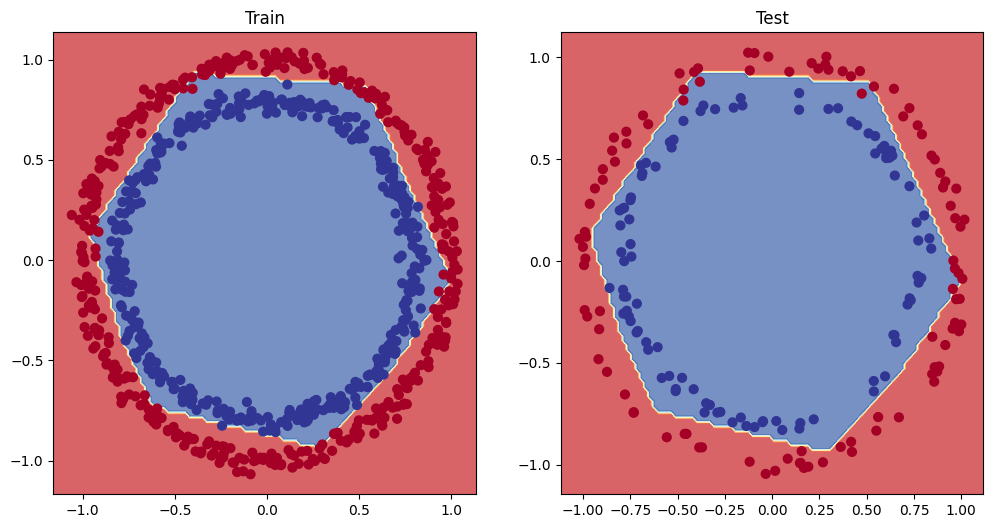

In [49]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X_test, y_test);

### Clasification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you shoulkd be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikitlearn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


In [50]:
# Check the accuracy of outr model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {accuracy*100:.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9700
Model loss on the test set: 0.10668370872735977
Model accuracy on the test set: 97.00%


### How about a confusion matrix

In [51]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

Oops... looks like our predictionas array has come in **prediction probability** form... the standard output from the sigmoid(or softmax)

In [52]:
y_preds[:10]

array([[0.9595516 ],
       [0.9943533 ],
       [0.9983586 ],
       [0.9812902 ],
       [0.9062583 ],
       [0.2403198 ],
       [0.87439245],
       [0.45253795],
       [0.97112185],
       [0.00435945]], dtype=float32)

In [53]:
9.9167573e-01

0.99167573

In [54]:
# Convert our predictions probabiliities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [55]:
# Create matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[95,  6],
       [ 0, 99]])

Prettify Confusion Matrix

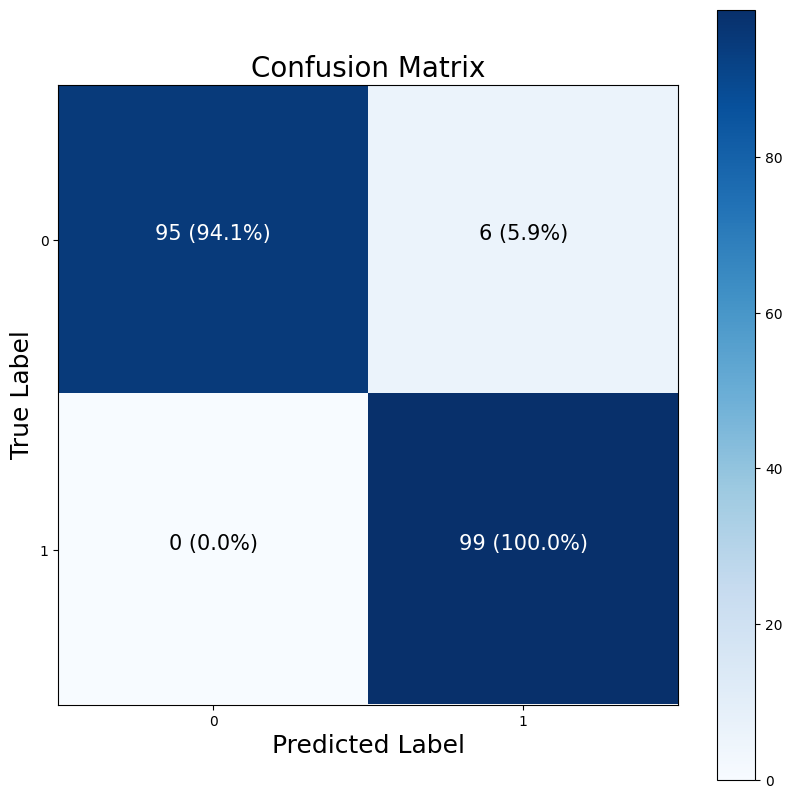

In [56]:
# Note : the confusion matrix code is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let`s prettify
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set axis position in the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment='center',
           color='white' if cm[i,j] > threshold else "black",
           size=15)

In [57]:
(95/426)*100

22.300469483568076

## Work with a larger dataset (Multiclass Classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification
* It also means the same even if you have 100 different classes

To practivce, we are building a neural network to classify different items of clothing.



### Get familiar with data

In [58]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# This data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [59]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [60]:
# Check the shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

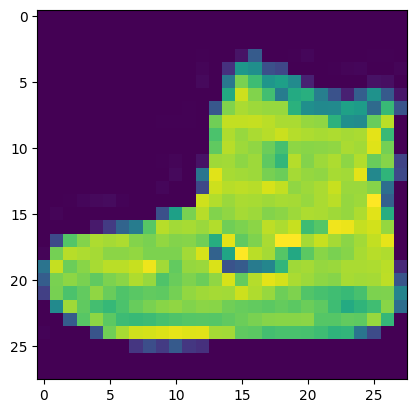

In [61]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [62]:
# cCreate a samll list with the names of the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

len(class_names)

10

Text(0.5, 1.0, 'Bag')

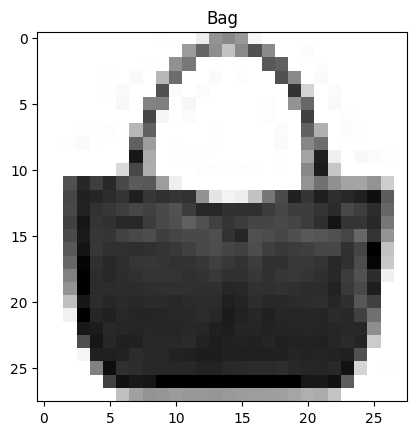

In [63]:
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

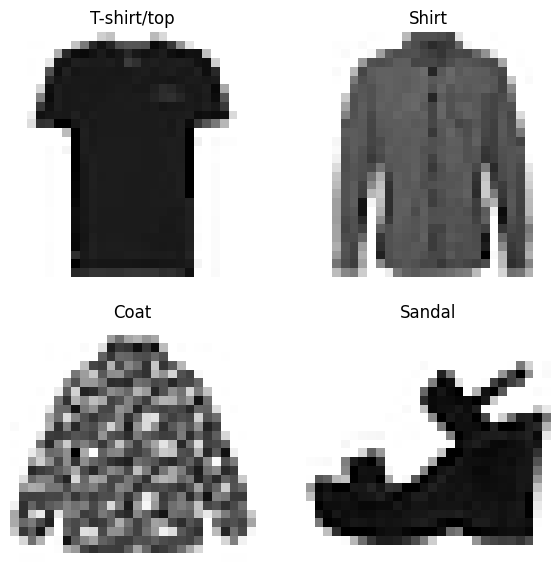

In [64]:
# Plot multiple random images from fashionMnist
import random
plt.figure(figsize=(7, 7))
for i in range (4):
  ax = plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  ax.axis('off')

### Building a multi-class classification model

In [65]:
# Build a model
# Set random seed
tf.random.set_seed(42)

# Create the model
model_f01 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_f01.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history_f01 = model_f01.fit(train_data,
                                  train_labels,
                                  epochs=10,
                                  validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9983 - accuracy: 0.2169 - val_loss: 1.8650 - val_accuracy: 0.2529
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6529 - accuracy: 0.3107 - val_loss: 1.5970 - val_accuracy: 0.3241
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5187 - accuracy: 0.3370 - val_loss: 1.4985 - val_accuracy: 0.3488
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4725 - accuracy: 0.3480 - val_loss: 1.4697 - val_accuracy: 0.3386
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4352 - accuracy: 0.3744 - val_loss: 1.4088 - val_accuracy: 0.3858
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3817 - accuracy: 0.4036 - val_loss: 1.3786 - val_accuracy: 0.4054
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3584 - accuracy: 0.4045 - val_loss: 1.3674 - val_accuracy:

In [66]:
# Summary
model_f01.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 4)                 3140      
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# Check the min and max of our data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer normilized data

In [68]:
# Normalize (dividing by the maximum)
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check max and min
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [69]:
# Build a model
# Set random seed
tf.random.set_seed(42)

# Create the model
model_f02 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_f02.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
norm_history_f02 = model_f02.fit(train_data_norm,
                                  tf.one_hot(train_labels, depth=10),
                                  epochs=10,
                                  validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2903 - accuracy: 0.5487 - val_loss: 0.9934 - val_accuracy: 0.6599
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8952 - accuracy: 0.6934 - val_loss: 0.8255 - val_accuracy: 0.7336
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7335 - accuracy: 0.7519 - val_loss: 0.7078 - val_accuracy: 0.7526
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6658 - accuracy: 0.7638 - val_loss: 0.6755 - val_accuracy: 0.7611
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6423 - accuracy: 0.7719 - val_loss: 0.6605 - val_accuracy: 0.7648
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6296 - accuracy: 0.7756 - val_loss: 0.6551 - val_accuracy: 0.7695
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6226 - accuracy: 0.7797 - val_loss: 0.6469 - val_accuracy:

👁️ Neural Networks prefer data as normalized/scaled form

<Axes: title={'center': 'Normalized data'}>

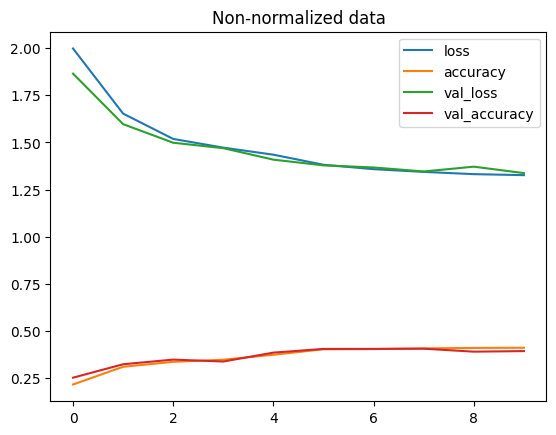

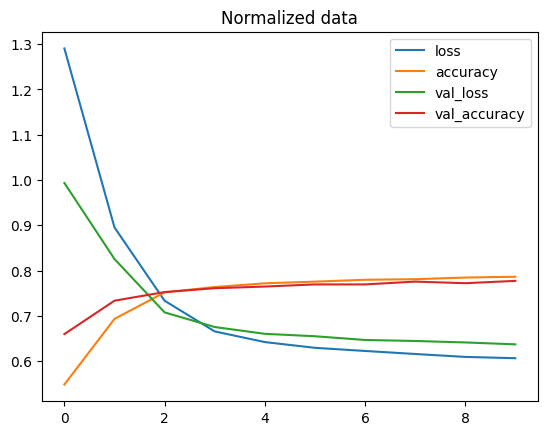

In [70]:
import pandas as pd
#Plot the non-normalized data loss curves
pd.DataFrame(non_norm_history_f01.history).plot(title='Non-normalized data')
# Plot normalized data
pd.DataFrame(norm_history_f02.history).plot(title='Normalized data')

👁️ **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

### Find the ideal learning rate

In [81]:
# Set the random seed
tf.random.set_seed(42)

# create the  model
model_f03 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_f03.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# Create a lr callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model
history_f03 = model_f03.fit(train_data_norm,
                            tf.one_hot(train_labels, depth=10),
                            epochs=40,
                            callbacks=([lr_scheduler]),
                            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2320 - accuracy: 0.5211 - val_loss: 0.9729 - val_accuracy: 0.6011 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8862 - accuracy: 0.6217 - val_loss: 0.8428 - val_accuracy: 0.6320 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8090 - accuracy: 0.6575 - val_loss: 0.7946 - val_accuracy: 0.6808 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7414 - accuracy: 0.7147 - val_loss: 0.7264 - val_accuracy: 0.7385 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6598 - accuracy: 0.7603 - val_loss: 0.6620 - val_accuracy: 0.7600 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6324 - accuracy: 0.7688 - val_loss: 0.6615 - val_accuracy: 0.7581 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

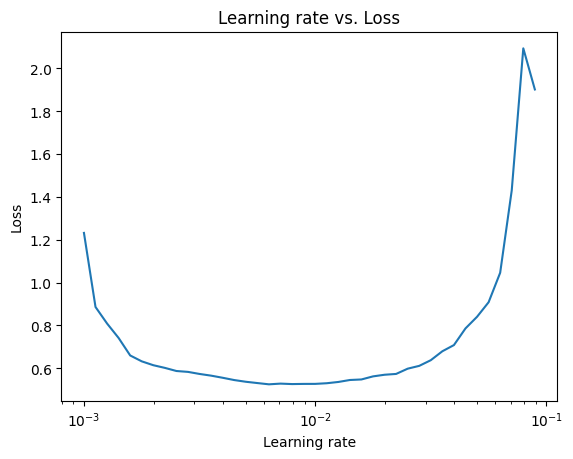

In [82]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_f03.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss');

In [87]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_f04 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

# Compile the model
model_f04.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                  metrics=['accuracy'])

# Fit the model
history_f04 = model_f04.fit(train_data_norm,
                            tf.one_hot(train_labels, depth=10),
                            epochs=20,
                            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8984 - accuracy: 0.6884 - val_loss: 0.6832 - val_accuracy: 0.7591
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6396 - accuracy: 0.7779 - val_loss: 0.6607 - val_accuracy: 0.7720
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5960 - accuracy: 0.7968 - val_loss: 0.6085 - val_accuracy: 0.7942
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5638 - accuracy: 0.8076 - val_loss: 0.6009 - val_accuracy: 0.7941
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5455 - accuracy: 0.8126 - val_loss: 0.5906 - val_accuracy: 0.7981
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5321 - accuracy: 0.8158 - val_loss: 0.5850 - val_accuracy: 0.7984
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5258 - accuracy: 0.8170 - val_loss: 0.5771 - val_accuracy:

### Evaluating our multi-class classification model

To evaluate our multi-class classification model
* Evaluate its perfomrance using other classification methods (such as confusion matrix)
* Assess some of its results (through visualizations)
* Improve its results (by training for longer or changing its architecture)
* Save and export it for use in an application

Let's go through the top's 2

In [101]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let`s prettify
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set axis position in the bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size + 2)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i,j] > threshold else "black",
            size=text_size - 5)

In [89]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [91]:
# Make some predictions with our model
y_probs = model_f04.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[9.43771374e-06, 4.69848899e-12, 4.50005382e-06, 2.11683227e-10,
        8.84332181e-08, 1.56881467e-01, 1.79780163e-05, 1.12847894e-01,
        7.30230659e-03, 7.22936332e-01],
       [4.05198487e-04, 1.16721732e-09, 8.83618951e-01, 1.90836698e-08,
        1.57048032e-02, 2.09006508e-21, 9.99691859e-02, 0.00000000e+00,
        3.01939086e-04, 2.87953110e-18],
       [2.05268492e-07, 9.99491632e-01, 2.78724765e-04, 2.75095153e-05,
        2.00008231e-04, 1.41792160e-08, 1.83736802e-06, 3.62271860e-26,
        2.99182332e-08, 1.15615722e-16],
       [1.77308834e-08, 9.99797583e-01, 6.03474800e-05, 1.80059596e-05,
        1.23649050e-04, 2.89046651e-12, 3.31663188e-07, 2.37592094e-33,
        1.02539977e-09, 1.25119041e-20],
       [8.95252451e-02, 4.90919683e-06, 1.81800157e-01, 1.85272412e-03,
        4.10025716e-02, 3.53576380e-13, 6.62193954e-01, 3.12695608e-24,
        2.36204509e-02, 1.48105764e-10]], dtype=float32)

👁️ Remember to make predictions in the same kind of data you're model was trained on (e.g. normalized data)

In [94]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([9.43771374e-06, 4.69848899e-12, 4.50005382e-06, 2.11683227e-10,
        8.84332181e-08, 1.56881467e-01, 1.79780163e-05, 1.12847894e-01,
        7.30230659e-03, 7.22936332e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [96]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# visualize the first 10 prredictions
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [97]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[736,   2,  15,  74,   6,   4, 124,   1,  37,   1],
       [  1, 948,  10,  30,   5,   0,   0,   0,   6,   0],
       [ 13,   4, 688,  12, 139,   2, 121,   0,  21,   0],
       [ 37,  16,   7, 823,  39,   4,  65,   1,   8,   0],
       [  2,   2,  93,  22, 757,   0,  97,   0,  27,   0],
       [  0,   0,   0,   0,   0, 899,   0,  57,   3,  41],
       [136,   6,  99,  48, 110,   3, 528,   1,  69,   0],
       [  0,   0,   0,   0,   0,  30,   0, 935,   0,  35],
       [  0,   2,   1,   8,   1,  16,  15,   3, 951,   3],
       [  0,   0,   0,   0,   0,  31,   0,  62,   8, 899]])

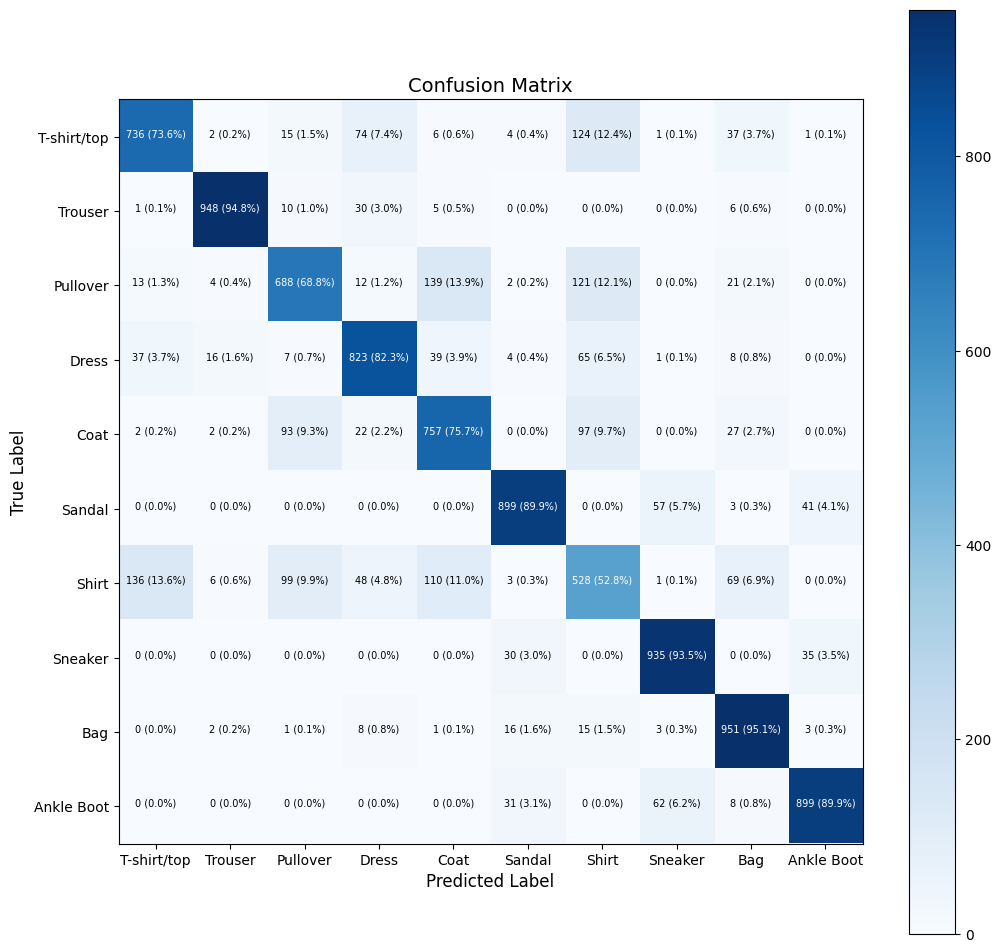

In [104]:
# Make a prettyer confusion matrix
make_confusion_matrix(test_labels, y_preds, class_names, figsize=(12,12), text_size=12)

👁️ **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

Make a little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label


In [109]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image from the dataset.
  Plots it.
  Predict the image with the model.
  Label the image with the prediction and the true
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel("Img: {}, Pred: {} {:2.0f}% (True: {})".format(i,
                                                            pred_label,
                                                            100*tf.reduce_max(pred_probs),
                                                            true_label),
             color=color)

1/1 [==============================] - 0s 20ms/step


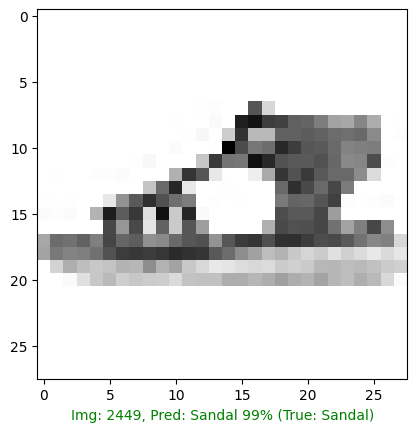

In [117]:
# Check out previous function
plot_random_image(model=model_f04,
                  images=test_data_norm, # <--- Always make preds on the same kind of data
                  true_labels=test_labels,
                  classes=class_names)

📑 **EXERCISE:** Try to change the function to plot more than 1 image ( maybe 4 rows and 4 columns)

### What patterns is our model learning?

In [118]:
# Find the layers of our most recent model
model_f04.layers

In [119]:
model_f04.layers[1]

In [122]:
# Get the patterns of a layer in our network
weights, biases = model_f04.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.89150035,  2.0076702 , -1.600545  ,  1.0214769 ],
        [-1.6173931 ,  1.263849  , -0.21281153, -1.5761805 ],
        [-0.6428603 ,  0.78304225, -1.7286221 , -1.5678715 ],
        ...,
        [ 0.0661137 , -0.5902742 ,  0.7880511 ,  0.4780174 ],
        [-0.01677405, -1.0794563 ,  0.19536017,  0.5790015 ],
        [ 0.389291  ,  0.90506727, -0.93923885,  0.4596993 ]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector...

In [123]:
# Biases, and shapes
biases, biases.shape

(array([1.0276557, 1.3820235, 2.5500488, 1.6998572], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initializaed as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

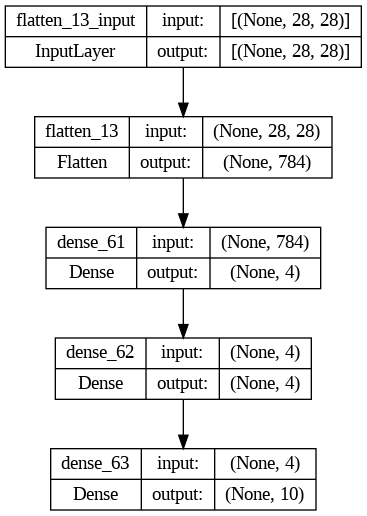

In [125]:
# Another way of viewing our depp learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_f04, show_shapes=True)